# 1. Import and Install Dependencies

## 1.1 Install Dependencies

In [3]:
!pip install tensorflow==2.6.2 tensorflow-gpu==2.6.2 tensorflow-io matplotlib

Defaulting to user installation because normal site-packages is not writeable


## 1.2 Load Dependencies

In [2]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf 
import tensorflow_io as tfio

# 2. Build Data Loading Function

## 2.1 Define Paths to Files

In [65]:
BREATH_FILE = os.path.join('data','breaths','how_to_find_breaths-02.wav')
NON_BREATH_FILE = os.path.join('data','non-breaths','how_to_find_non_breath-0.wav')

## 2.2 Build Dataloading Function

In [66]:
def load_wav_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels) 
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    return wav

## 2.3 Plot Wave

In [67]:
wave = load_wav_mono(BREATH_FILE)
nwave = load_wav_mono(NON_BREATH_FILE)

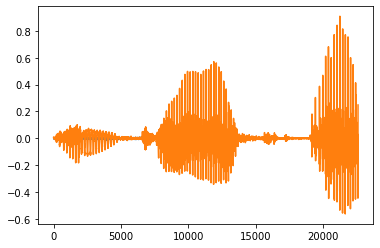

In [68]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

# 3. Create Tensorflow Dataset

## 3.1 Define Paths to Positive and Negative Data

In [69]:
POS = os.path.join('data','breaths')
NEG = os.path.join('data','non-breaths')

## 3.2 Create Tensorflow Datasets

In [70]:
pos = tf.data.Dataset.list_files(POS+'/*.wav')
neg = tf.data.Dataset.list_files(NEG+'/*.wav')

## 3.3 Add labels and Combine Positive and Negative Samples

In [138]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

In [77]:
data.shuffle(10000).as_numpy_iterator().next()

(b'data/non-breaths/holiday_non_breath-128.wav', 0.0)

# 4. Determine Average Length of a Breath

## 4.1 Calculate Wave Cycle Length

In [836]:
os.listdir(os.path.join('data','breaths'))

['how_to_find_breaths-297.wav',
 'sleep_science_breaths-576.wav',
 'sleep_science_breaths-228.wav',
 'sleep_science_breaths-468.wav',
 'holiday_breaths-78.wav',
 'sleep_science_breaths-688.wav',
 'how_to_find_breaths-346.wav',
 'sleep_science_breaths-546.wav',
 'holiday_breaths-41.wav',
 'sleep_science_breaths-461.wav',
 'sleep_science_breaths-528.wav',
 'favorites_breaths-38.wav',
 'sleep_science_breaths-711.wav',
 'holiday_breaths-139.wav',
 'sleep_science_breaths-407.wav',
 'holiday_breaths-31.wav',
 'how_to_find_breaths-228.wav',
 'sleep_science_breaths-157.wav',
 'favorites_breaths-257.wav',
 'how_to_find_breaths-138.wav',
 'sleep_science_breaths-743.wav',
 'favorites_breaths-236.wav',
 'how_to_find_breaths-36.wav',
 'how_to_find_breaths-159.wav',
 'sleep_science_breaths-118.wav',
 'how_to_find_breaths-313.wav',
 'holiday_breaths-60.wav',
 'sleep_science_breaths-303.wav',
 'favorites_breaths-107.wav',
 'holiday_breaths-52.wav',
 'favorites_breaths-255.wav',
 'how_to_find_breaths-1

In [837]:
lengths = []
for file in os.listdir(os.path.join('data','breaths')):
    tensor_wave = load_wav_mono(os.path.join('data','breaths', file))
    lengths.append(len(tensor_wave))

In [838]:
os.listdir(os.path.join('data','non-breaths'))

['how_to_find_non_breath-66.wav',
 'sleep_science_non_breath-623.wav',
 'how_to_find_non_breath-308.wav',
 'favorites_non_breath-79.wav',
 'sleep_science_non_breath-774.wav',
 'holiday_non_breath-121.wav',
 'sleep_science_non_breath-126.wav',
 'sleep_science_non_breath-273.wav',
 'favorites_non_breath-245.wav',
 'sleep_science_non_breath-16.wav',
 'sleep_science_non_breath-732.wav',
 'sleep_science_non_breath-249.wav',
 'sleep_science_non_breath-498.wav',
 'how_to_find_non_breath-227.wav',
 'how_to_find_non_breath-171.wav',
 'favorites_non_breath-101.wav',
 'favorites_non_breath-40.wav',
 'holiday_non_breath-63.wav',
 'favorites_non_breath-171.wav',
 'holiday_non_breath-180.wav',
 'sleep_science_non_breath-278.wav',
 'how_to_find_non_breath-274.wav',
 'how_to_find_non_breath-143.wav',
 'how_to_find_non_breath-220.wav',
 'sleep_science_non_breath-314.wav',
 'sleep_science_non_breath-328.wav',
 'sleep_science_non_breath-795.wav',
 'holiday_non_breath-71.wav',
 'sleep_science_non_breath-4

In [839]:
lengths

[15108,
 10597,
 12404,
 24627,
 13690,
 14060,
 8915,
 13788,
 15516,
 19057,
 10717,
 34190,
 6202,
 41320,
 8249,
 36093,
 10138,
 9995,
 35324,
 18737,
 6448,
 18706,
 16646,
 17120,
 18154,
 12701,
 13275,
 28089,
 19661,
 42481,
 14917,
 11242,
 6312,
 13668,
 16511,
 18752,
 10769,
 13925,
 14811,
 23023,
 12554,
 22070,
 23122,
 25721,
 23668,
 11982,
 9092,
 26136,
 33177,
 11289,
 10537,
 16804,
 13939,
 8369,
 10446,
 28433,
 16679,
 19748,
 9423,
 29111,
 7767,
 10085,
 17040,
 9666,
 22010,
 19268,
 25797,
 20291,
 17092,
 12363,
 8953,
 18264,
 17513,
 30202,
 25324,
 17010,
 14022,
 17040,
 8205,
 15293,
 20098,
 22794,
 16015,
 13207,
 7810,
 16594,
 6555,
 35465,
 17159,
 17672,
 16764,
 7797,
 22957,
 10898,
 24717,
 9182,
 19094,
 14082,
 15023,
 11558,
 33417,
 17822,
 13306,
 13254,
 23212,
 12825,
 7978,
 17040,
 16829,
 17341,
 33116,
 19124,
 15267,
 14239,
 12193,
 8481,
 10176,
 13162,
 9309,
 13254,
 23149,
 20787,
 37782,
 8835,
 24145,
 11834,
 14161,
 1810

## 4.2 Calculate Mean, Min and Max

In [840]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=18141>

In [841]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=4215>

In [842]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=55508>

In [11]:
BREATH_LENGTH = 21000
SAMPLE_RATE = 44100

# 5. Build Preprocessing Function to Convert to Spectrogram

## 5.1 Build Preprocessing Function

In [139]:
def preprocess(file_path, label): 
    wav = load_wav_mono(file_path)
    wav = wav[:BREATH_LENGTH]
    zero_padding = tf.zeros([BREATH_LENGTH] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=1025, frame_step=102)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

## 5.2 Test Out the Function and Viz the Spectrogram

In [140]:
filepath, label = negatives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [141]:
spectrogram, label = preprocess(filepath, label)

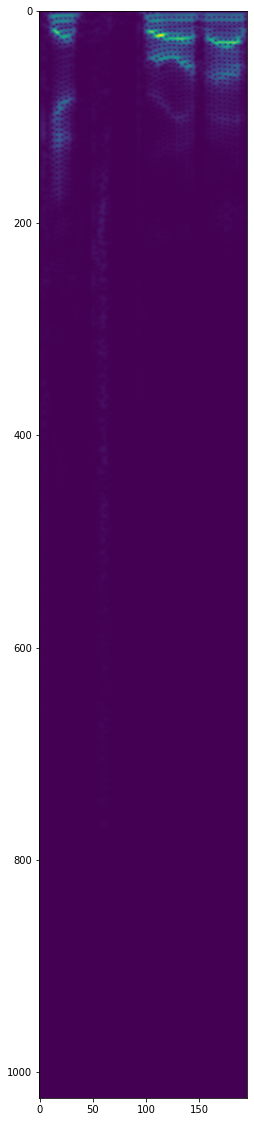

In [142]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

# 6. Create Training and Testing Partitions

## 6.1 Create a Tensorflow Data Pipeline

In [143]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)
data

<PrefetchDataset shapes: ((None, None, 1025, 1), (None,)), types: (tf.float32, tf.float32)>

## 6.2 Split into Training and Testing Partitions

In [144]:
len(data)

203

In [145]:
train = data.take(142)
test = data.skip(142).take(61)

## 6.3 Test One Batch

In [146]:
samples, labels = train.as_numpy_iterator().next()

In [147]:
samples.shape

(16, 196, 1025, 1)

# 7. Build Deep Learning Model

## 7.1 Load Tensorflow Dependencies

In [326]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

## 7.2 Build Sequential Model, Compile and View Summary

In [968]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(198,513,1)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [969]:
model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [329]:
import datetime
from keras.callbacks import ModelCheckpoint

In [970]:
# Create callbacks
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=25,
    mode='min',
)
model_path = os.path.join('output_model_checkpoints', 'fifth model')
checkpoint_callback = ModelCheckpoint(filepath=model_path,
                                     monitor='val_loss',
                                     verbose=0,
                                     save_best_only=True,
                                     mode='min')

In [971]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 196, 511, 16)      160       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 194, 509, 16)      2320      
_________________________________________________________________
flatten_6 (Flatten)          (None, 1579936)           0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               202231936 
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 129       
Total params: 202,234,545
Trainable params: 202,234,545
Non-trainable params: 0
_________________________________________________________________


## 7.3 Fit Model, View Loss and KPI Plots

In [972]:
hist = model.fit(train, epochs=10, validation_data=test, callbacks=[tensorboard_callback, early_stopping_callback, checkpoint_callback])

Epoch 1/10
142/142 [==============================] - 290s 2s/step - loss: 3.7280 - recall_6: 0.9625 - precision_6: 0.9639 - val_loss: 0.0858 - val_recall_6: 1.0000 - val_precision_6: 0.8733
INFO:tensorflow:Assets written to: output_model_checkpoints/fifth model/assets
Epoch 2/10
142/142 [==============================] - 256s 2s/step - loss: 0.0544 - recall_6: 0.9993 - precision_6: 0.9794 - val_loss: 0.0659 - val_recall_6: 1.0000 - val_precision_6: 0.8815
INFO:tensorflow:Assets written to: output_model_checkpoints/fifth model/assets
Epoch 3/10
142/142 [==============================] - 257s 2s/step - loss: 0.0344 - recall_6: 1.0000 - precision_6: 0.9876 - val_loss: 0.0493 - val_recall_6: 1.0000 - val_precision_6: 0.8952
INFO:tensorflow:Assets written to: output_model_checkpoints/fifth model/assets
Epoch 4/10
142/142 [==============================] - 259s 2s/step - loss: 0.0395 - recall_6: 0.9986 - precision_6: 0.9807 - val_loss: 0.0361 - val_recall_6: 1.0000 - val_precision_6: 0.9196

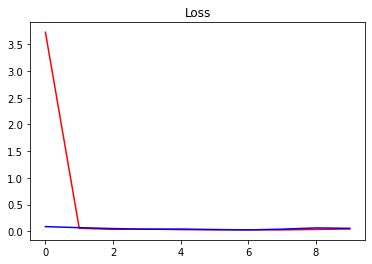

In [973]:
plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()

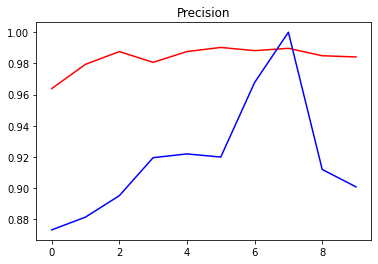

In [974]:
plt.title('Precision')
plt.plot(hist.history['precision_6'], 'r')
plt.plot(hist.history['val_precision_6'], 'b')
plt.show()

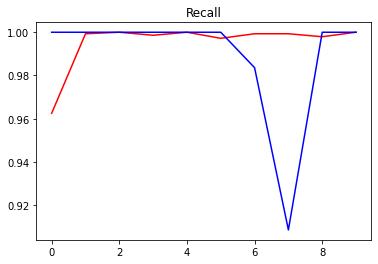

In [975]:
plt.title('Recall')
plt.plot(hist.history['recall_6'], 'r')
plt.plot(hist.history['val_recall_6'], 'b')
plt.show()

## 7.4 Display Tensorflow Stats

In [47]:
%load_ext tensorboard

In [51]:
%tensorboard --logdir logs/fit --host localhost

Reusing TensorBoard on port 6008 (pid 11562), started 0:01:35 ago. (Use '!kill 11562' to kill it.)

# 8. Make a Prediction on a Single Clip

## 8.1 Get One Batch and Make a Prediction

In [148]:
#Load custom model
myModel = tf.keras.models.load_model(os.path.join("output_model_checkpoints", "second model"))
myModel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 194, 1023, 16)     160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 192, 1021, 16)     2320      
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136512)           0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               401473664 
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 401,476,273
Trainable params: 401,476,273
Non-trainable params: 0
_________________________________________________________________


In [179]:
X_test, y_test = test.as_numpy_iterator().next()

In [180]:
yhat = myModel.predict(X_test)
yhat

array([[1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.2091843e-36]], dtype=float32)

In [184]:
print(y_test)

[1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]


## 8.2 Convert Logits to Classes 

In [182]:
yhat = [1 if prediction > 0.95 else 0 for prediction in yhat]
yhat

[1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0]

# 9. Build Podcast Parsing Functions

## 9.1 Load up MP3s

In [920]:
def load_mp3_mono(filename):
    """ Load a WAV file, convert it to a float tensor """
    res = tfio.audio.AudioIOTensor(filename)
    # Convert to tensor and combine channels 
    tensor = res.to_tensor()
    tensor = tf.math.reduce_sum(tensor, axis=1) / 2 
    # Extract sample rate and cast
    sample_rate = res.rate
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(tensor,rate_in=sample_rate, rate_out=41000)
    return wav

In [921]:
mp3 = os.path.join('data', 'podcasts', 'Favorites.mp3')

In [922]:
wav = load_mp3_mono(mp3)
len(wav)

49705293

In [923]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=BREATH_LENGTH, sequence_stride=BREATH_LENGTH, batch_size=1)

In [924]:
samples, index = audio_slices.as_numpy_iterator().next()

## 9.2 Build Function to Convert Clips into Windowed Spectrograms

In [925]:
def preprocess_mp3(sample, index):
    sample = sample[0]
    zero_padding = tf.zeros([BREATH_LENGTH] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zero_padding, sample],0)
    spectrogram = tf.signal.stft(wav, frame_length=1025, frame_step=102)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

## 9.3 Convert Longer Clips into Windows and Make Predictions

In [926]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=BREATH_LENGTH, sequence_stride=BREATH_LENGTH, batch_size=1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)

In [928]:
yhat = myModel.predict(audio_slices)
yhat = [1 if prediction > 0.95 else 0 for prediction in yhat]
yhat

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


## 9.4 Group Consecutive Detections

In [351]:
from itertools import groupby

In [929]:
yhat = [key for key, group in groupby(yhat)]
breaths = tf.math.reduce_sum(yhat).numpy()

In [930]:
breaths

118

# 10. Make Predictions

## 10.1 Loop over all recordings and make predictions

In [894]:
results = {}
for file in os.listdir(os.path.join('data', 'podcasts')):
    FILEPATH = os.path.join('data','podcasts', file)
    
    wav = load_mp3_mono(FILEPATH)
    audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=BREATH_LENGTH, sequence_stride=BREATH_LENGTH, batch_size=1)
    audio_slices = audio_slices.map(preprocess_mp3)
    audio_slices = audio_slices.batch(64)
    
    yhat = model.predict(audio_slices)
    
    results[file] = yhat

In [895]:
results

{'How to find.mp3': array([[1.1590861e-07],
        [2.0911462e-16],
        [1.8191040e-03],
        ...,
        [3.9756255e-06],
        [2.5254774e-05],
        [7.0363581e-03]], dtype=float32),
 'Favorites.mp3': array([[1.4980901e-13],
        [8.3269617e-16],
        [1.7129916e-17],
        ...,
        [5.4312350e-09],
        [1.3076774e-09],
        [3.4020824e-12]], dtype=float32),
 'SLEEP SCIENCE TRIMMED.mp3': array([[3.5748939e-11],
        [4.6682203e-10],
        [2.3586108e-10],
        ...,
        [7.6343993e-17],
        [1.8253579e-15],
        [6.1216435e-11]], dtype=float32),
 'Create your own holiday.mp3': array([[4.6451753e-01],
        [2.0280878e-28],
        [3.3010617e-23],
        ...,
        [2.2742753e-14],
        [9.4570266e-14],
        [3.9568942e-08]], dtype=float32)}

## 10.2 Convert Predictions into Classes

In [898]:
class_preds = {}
for file, logits in results.items():
    class_preds[file] = [1 if prediction > 0.5 else 0 for prediction in logits]
class_preds

{'How to find.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

## 10.3 Group Consecutive Detections

In [899]:
postprocessed = {}
for file, scores in class_preds.items():
    postprocessed[file] = tf.math.reduce_sum([key for key, group in groupby(scores)]).numpy()
postprocessed

{'How to find.mp3': 43,
 'Favorites.mp3': 48,
 'SLEEP SCIENCE TRIMMED.mp3': 139,
 'Create your own holiday.mp3': 50}

# 11. Export Model and Results

In [646]:
import csv

In [853]:
with open(os.path.join('results','results_4.csv'), 'w', newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(['recording', 'no_breaths'])
    for key, value in postprocessed.items():
        writer.writerow([key, value])

In [854]:
model.save('saved models/myModel_3_121_epoch')

INFO:tensorflow:Assets written to: saved models/myModel_3_121_epoch/assets
